In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df['Differnce_in_outstanding_amount']=df['total_debt_outstanding']-df['loan_amt_outstanding']

In [4]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Differnce_in_outstanding_amount
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,-1306.073967
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6269.823794
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,-1335.178409
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,-2264.917604
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,422.998469


Distribution of Credit lines Outstanding

<Axes: xlabel='credit_lines_outstanding'>

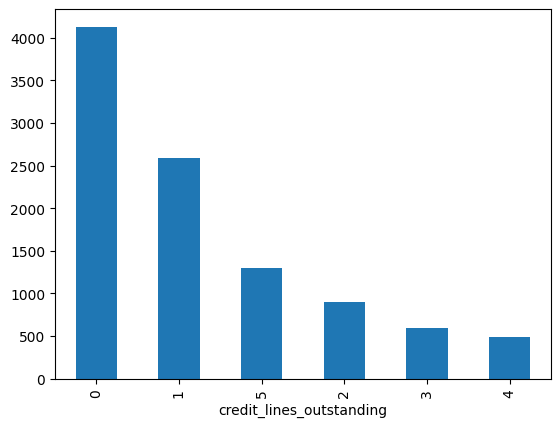

In [12]:
df['credit_lines_outstanding'].value_counts().plot(kind='bar')

Distribution of customers years of employment

<Axes: xlabel='years_employed'>

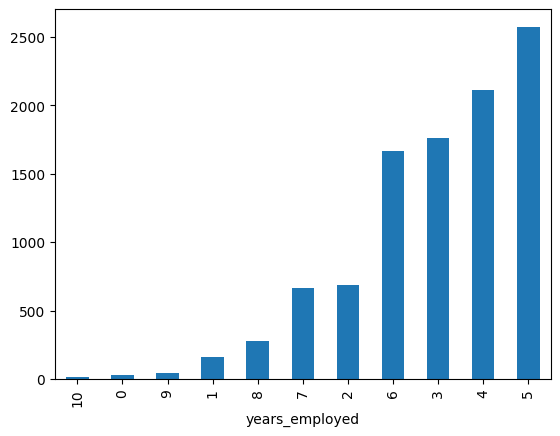

In [24]:
df['years_employed'].value_counts().sort_values(ascending=True).plot(kind='bar')

bi-variate analysis of years employed and credit lines outstanding

In [31]:
group_data=df.groupby('credit_lines_outstanding')['years_employed'].value_counts()

In [32]:
group_data.head()

credit_lines_outstanding  years_employed
0                         4                 1164
                          3                  942
                          5                  931
                          6                  490
                          2                  370
Name: count, dtype: int64

<Axes: xlabel='credit_lines_outstanding'>

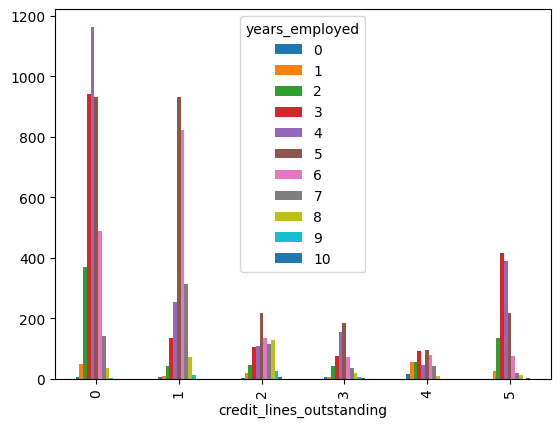

In [33]:
group_data.unstack().plot(kind='bar')

Bi-Variate analysis of credit lines outstanding and default columns


In [34]:
group_data=df.groupby('default')['credit_lines_outstanding'].value_counts()

<Axes: xlabel='default'>

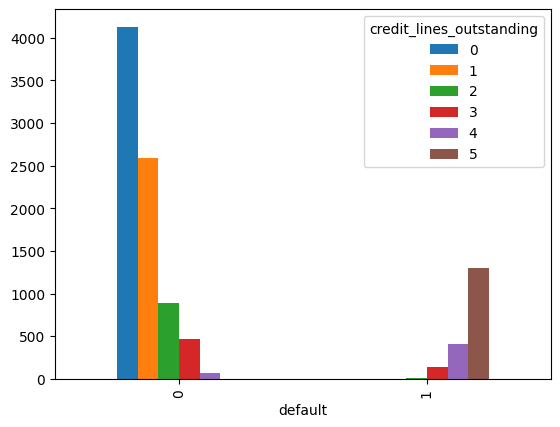

In [35]:
group_data.unstack().plot(kind='bar')

Bi-variate analysis of years employed and default column

In [36]:
group_data=df.groupby('default')['years_employed'].value_counts()

<Axes: xlabel='default'>

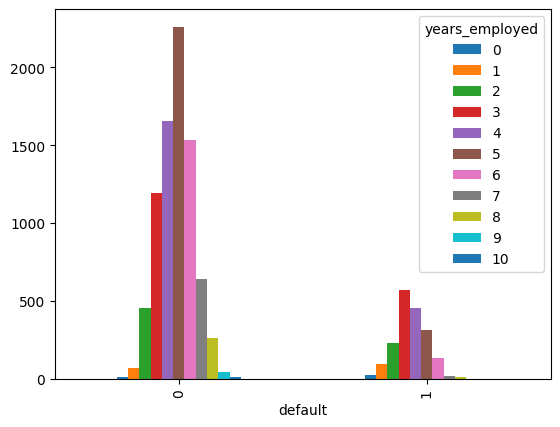

In [37]:
group_data.unstack().plot(kind='bar')

comparison of income and loan amount outstanding with dafault

In [44]:
df['diff_capable_payers']=df['income']-df['loan_amt_outstanding']


In [46]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Differnce_in_outstanding_amount,Difference_in_outstanding_amount_normalized,diff_capable_payers
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,-1306.073967,0.160713,72817.840267
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6269.823794,0.333879,24689.506524
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,-1335.178409,0.160048,62503.703201
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,-2264.917604,0.138796,69590.235469
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,422.998469,0.200235,22102.498592


In [55]:
if (df['diff_capable_payers']<=0).all():
    print('yes')
else:
    print('no')



no


In [52]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Differnce_in_outstanding_amount,Difference_in_outstanding_amount_normalized,diff_capable_payers,capable_payers
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,-1306.073967,0.160713,72817.840267,yes
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6269.823794,0.333879,24689.506524,yes
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,-1335.178409,0.160048,62503.703201,yes
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,-2264.917604,0.138796,69590.235469,yes
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,422.998469,0.200235,22102.498592,yes


<Axes: xlabel='capable_payers'>

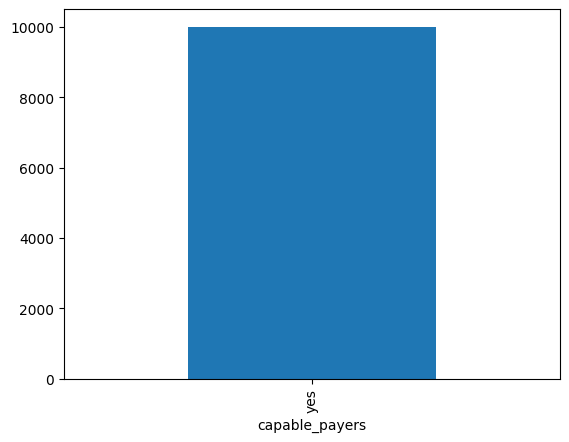

In [53]:
df['capable_payers'].value_counts().plot(kind='bar')

<Axes: xlabel='capable_payers'>

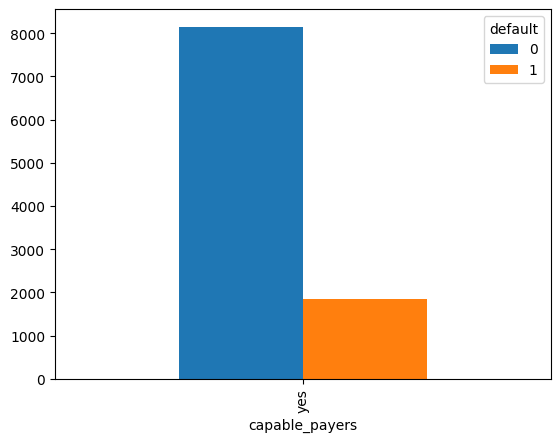

In [56]:
df.groupby('capable_payers')['default'].value_counts().unstack().plot(kind='bar')

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Difference_in_outstanding_amount_normalized'] = scaler.fit_transform(df[['Differnce_in_outstanding_amount']])


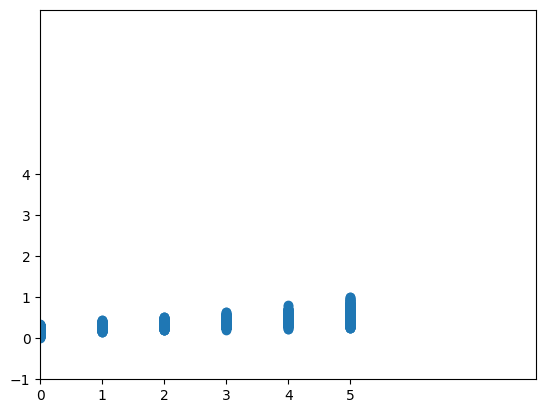

In [59]:
# plot
fig, ax = plt.subplots()

ax.scatter(df['credit_lines_outstanding'], df['Difference_in_outstanding_amount_normalized'])

ax.set(xlim=(0, 8), xticks=np.arange(0, 6),
       ylim=(0, 8), yticks=np.arange(-1, 5))

plt.show()

In [60]:
df.head(2)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Differnce_in_outstanding_amount,Difference_in_outstanding_amount_normalized,diff_capable_payers,capable_payers
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,-1306.073967,0.160713,72817.840267,yes
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6269.823794,0.333879,24689.506524,yes


In [71]:
df=df.drop(['customer_id','years_employed','Differnce_in_outstanding_amount','Difference_in_outstanding_amount_normalized'],axis=1)

In [72]:
df.head(2)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,605,0
1,5,1958.928726,8228.752520,26648.43525,572,1


In [73]:
X=df.drop(['default'],axis=1)
y=df['default']

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
# standardise feature variable necessary for logistic regression
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Model Building and training - Logistic Regression

In [79]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

Prediction and evaluation

In [85]:
y_pred=logistic_model.predict(X_test)


In [87]:
logistic_auc=roc_auc_score(y_test,y_pred)


In [89]:
logistic_auc

0.973908324288219

In [88]:
logistic_accuracy=accuracy_score(y_test,y_pred)

In [90]:
logistic_accuracy

0.985

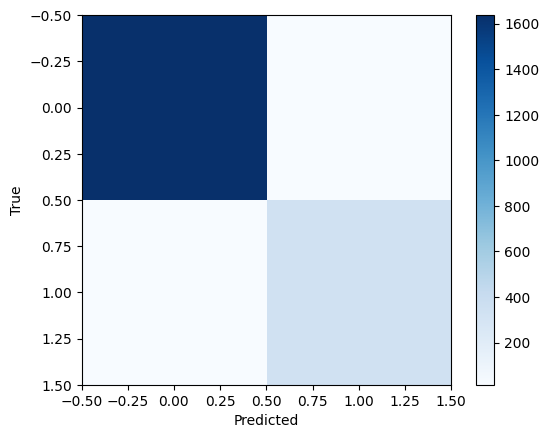

In [95]:
confusion_matrices=confusion_matrix(y_test,y_pred)
plt.imshow(confusion_matrices,cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Axes: >

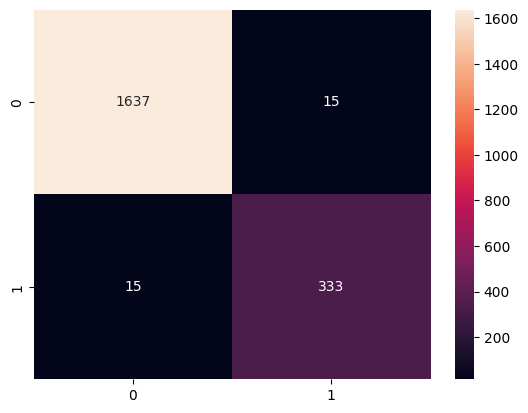

In [96]:
import seaborn as sns
sns.heatmap(confusion_matrices,annot=True,fmt='d')

Model building and training - Decision tree classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree_model=DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Prediction and Evaluation

In [99]:
y_pred_tree=tree_model.predict(X_test)

In [102]:
tree_auc=roc_auc_score(y_test,y_pred_tree)
tree_auc


0.965966018201553

In [103]:
tree_accuracy=accuracy_score(y_test,y_pred_tree)
tree_accuracy

0.9775

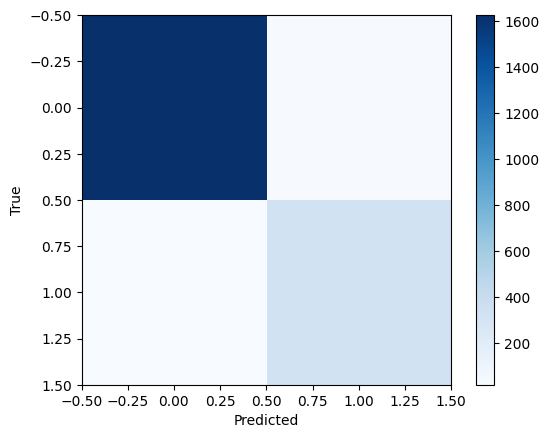

In [104]:
confusion_matrices_tree=confusion_matrix(y_test,y_pred_tree)
plt.imshow(confusion_matrices_tree,cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Axes: >

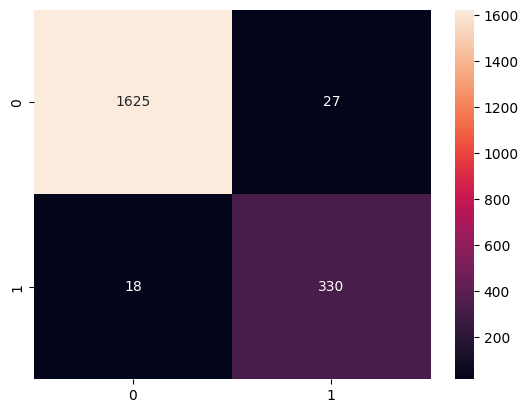

In [105]:
sns.heatmap(confusion_matrices_tree,annot=True,fmt='d')


Function to calculate expected loss considering recovering rate of 10%

In [119]:
def expected_loss_calculation(features, recovery_rate, model, scaler):
  df_features=pd.DataFrame([features])
  df_features_scaled=scaler.fit_transform(df_features)
  pred=model.predict_proba(df_features_scaled)[:,1][0]
  loan_amount=df_features['loan_amt_outstanding'].values[0]
  expected_loss=loan_amount*pred*(1-recovery_rate)
  return expected_loss


In [114]:
df.head(1)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,605,0


In [120]:
features={'credit_lines_outstanding': 1,
          'loan_amt_outstanding': 6378.897,
          'total_debt_outstanding': 8992.89,
          'income':38998.908,
          'fico_score':899}
expected_loss=expected_loss_calculation(features,0.10,logistic_model,scaler=StandardScaler())

In [121]:
expected_loss

0.6817684758371607